# Task
Based on the pre-selected load and weather data, we merge all datasets to one single dataframe and save it as a csv

# Import

In [1]:
#Pandas: Reading and analyzing data
import pandas as pd
#Numerical calcuations
import numpy as np
#statistical data visualization
import seaborn as sns
#Use Dates in Datetime Format
import datetime
#Tensorflow
#Iport all csv files in directory
import os
import glob

### Prepare final dataframe

In [2]:
# Import Weather data and add columns to final dataframe
user = 'rs1044' #'Jonas'
path = 'C:/Users/' + user + '/bwSyncShare/02Python Code/Data/00Final_weather_data/' + 'Data_weather_meteostat_2019-01-01 bis 2021_12-31.csv'
df = pd.read_csv(path, usecols=["Date", 'temp','dwpt','rhum','prcp','wdir','wspd','wpgt','pres','coco'], encoding= 'unicode_escape')
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date', drop=True)
df 

#Check: 26304 hours -> 01.01.2019 00:00 to 31.12.2021 23:59

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,coco
Date,,,,,,,,,
2019-01-01 00:00:00,5.3,4.9,97.0,0.0,211.0,11.1,16.7,1034.6,4.0
2019-01-01 01:00:00,5.2,4.8,97.0,0.0,211.0,11.1,16.7,1034.2,4.0
2019-01-01 02:00:00,5.1,4.7,97.0,0.0,213.0,13.0,18.5,1033.9,4.0
2019-01-01 03:00:00,5.0,4.6,97.0,0.0,217.0,13.0,18.5,1033.6,4.0
2019-01-01 04:00:00,5.0,4.4,96.0,0.0,218.0,13.0,20.4,1033.2,4.0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,11.0,7.7,80.0,0.0,222.0,16.7,29.6,1025.8,2.0
2021-12-31 20:00:00,10.7,7.8,82.0,0.0,224.0,16.7,29.6,1026.3,2.0
2021-12-31 21:00:00,10.5,7.6,82.0,0.0,221.0,16.7,27.8,1027.0,3.0


In [3]:
#Import all 33 load datasets and add values as column to dataframe with weather data to get final dataframe
path = 'C:/Users/rs1044/bwSyncShare/02Python Code/Data/00Final_load_data_selected_prepocessed/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
# loop over the list of csv files
for f in csv_files:
    #print(f[-42:-30])  
    load_data = pd.read_csv(f)
    load_data.Date = pd.to_datetime(load_data.Date)
    load_data = load_data.set_index('Date', drop=True)
    df = pd.merge(df, load_data, how='left', left_index=True, right_index=True, ).fillna(0).rename(columns={'Wert':f[-42:-30]})


In [4]:
"""
Column names: 
    'temp','dwpt','rhum','prcp','wdir','wspd','wpgt','pres','coco',
    '0101-ZE01-70', '0101-ZE01-74', '0141-ZE01-70', '0141-ZE01-74', '0145-ZE02-70', '0213-ZE01-71', '0223-ZE01-71',
    '0223-ZE02-71', '0232-ZE01-71', '0242-ZE01-70', '0242-ZE01-74', '0243-ZE01-70', '0245-ZE01-70', '0301-ZE01-70',
    '0301-ZE01-74', '0301-ZE02-70', '0301-ZE02-74', '0301-ZE03-70', '0301-ZE03-74', '0303-ZE01-70', '0310-ZE01-70',
    '0330-ZE01-74', '0330-ZE02-70', '0330-ZE03-70', '0353-ZE01-70', '0353-ZE03-70', '0404-ZE01-70', '0430-ZE01-70',
    '0439-ZE01-70', '0439-ZE01-72', '0439-ZE02-70', '5311-ZE01-70', '6907-ZE01-74'
"""
df

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,coco,0101-ZE01-70,...,0330-ZE03-70,0353-ZE01-70,0353-ZE03-70,0404-ZE01-70,0430-ZE01-70,0439-ZE01-70,0439-ZE01-72,0439-ZE02-70,5311-ZE01-70,6907-ZE01-74
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.3,4.9,97.0,0.0,211.0,11.1,16.7,1034.6,4.0,0.00,...,41.20,13.07868,19.3980,22.07784,0.00,0.0000,0.00000,13.36,0.00000,3.87
2019-01-01 01:00:00,5.2,4.8,97.0,0.0,211.0,11.1,16.7,1034.2,4.0,0.00,...,0.00,0.00000,19.4648,24.07752,0.00,34.3298,0.00000,0.00,0.00000,3.82
2019-01-01 02:00:00,5.1,4.7,97.0,0.0,213.0,13.0,18.5,1033.9,4.0,0.00,...,40.60,0.00000,19.4648,24.07752,0.44,34.4632,0.00000,13.22,0.00000,3.87
2019-01-01 03:00:00,5.0,4.6,97.0,0.0,217.0,13.0,18.5,1033.6,4.0,0.00,...,40.60,0.00000,19.6648,0.00000,0.00,34.3298,0.00000,13.36,0.69992,3.92
2019-01-01 04:00:00,5.0,4.4,96.0,0.0,218.0,13.0,20.4,1033.2,4.0,0.00,...,40.60,13.11876,19.9312,24.07752,0.00,0.0000,0.00000,13.38,0.00000,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,11.0,7.7,80.0,0.0,222.0,16.7,29.6,1025.8,2.0,33.44,...,0.00,0.00000,0.0000,0.00000,0.00,27.1972,3.01302,12.24,0.00000,7.95
2021-12-31 20:00:00,10.7,7.8,82.0,0.0,224.0,16.7,29.6,1026.3,2.0,0.00,...,65.96,12.75876,0.0000,0.00000,0.00,0.0000,3.01968,12.08,0.00000,7.95
2021-12-31 21:00:00,10.5,7.6,82.0,0.0,221.0,16.7,27.8,1027.0,3.0,0.00,...,0.00,0.00000,36.0630,0.00000,0.00,27.1972,3.01968,12.08,0.51994,7.93


# Visualize

Column names: <br> 
    'temp','dwpt','rhum','prcp','wdir','wspd','wpgt','pres','coco',
    '0101-ZE01-70', '0101-ZE01-74', '0141-ZE01-70', '0141-ZE01-74', '0145-ZE02-70', '0213-ZE01-71', '0223-ZE01-71',
    '0223-ZE02-71', '0232-ZE01-71', '0242-ZE01-70', '0242-ZE01-74', '0243-ZE01-70', '0245-ZE01-70', '0301-ZE01-70',
    '0301-ZE01-74', '0301-ZE02-70', '0301-ZE02-74', '0301-ZE03-70', '0301-ZE03-74', '0303-ZE01-70', '0310-ZE01-70',
    '0330-ZE01-74', '0330-ZE02-70', '0330-ZE03-70', '0353-ZE01-70', '0353-ZE03-70', '0404-ZE01-70', '0430-ZE01-70',
    '0439-ZE01-70', '0439-ZE01-72', '0439-ZE02-70', '5311-ZE01-70', '6907-ZE01-74'

<AxesSubplot: title={'center': 'KIt Dataset'}, xlabel='Time', ylabel='values'>

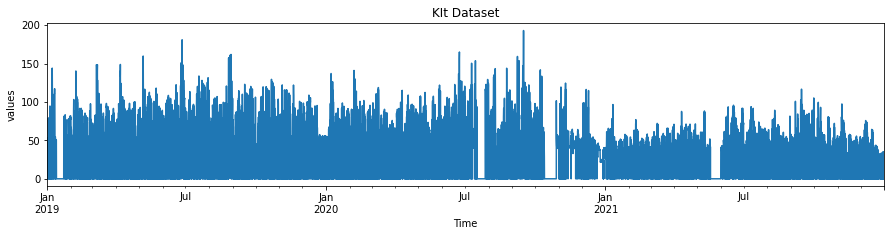

In [5]:
df['0101-ZE01-70'].plot(title="KIt Dataset",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="values",
             kind="line"
            )

# Store final dataframe as CSV-File

In [7]:
# Store as csv
user = 'rs1044' #'Jonas'
final_csv_name = 'C:/Users/' + user + '/bwSyncShare/02Python Code/Data/00Data_KIT_2019-01-01_to_2021_12_31.csv'
df.to_csv(final_csv_name , index = True, index_label='Date')

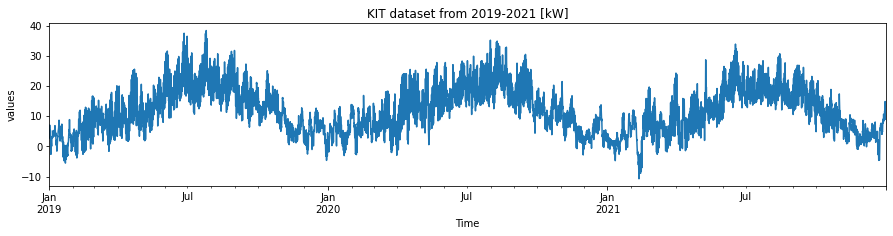

In [8]:
#Check if csv worked
df_check = pd.read_csv(final_csv_name, encoding= 'unicode_escape')
df_check.Date = pd.to_datetime(df_check['Date'])
df_check = df_check.set_index('Date', drop=True)
_ = df_check.temp.plot(title="KIT dataset from 2019-2021 [kW]",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="values",
             kind="line"
            )